# MOD300 Project 4 - Task 0: Reproduce Ebola SEZR Model Plots

Reproducing the SEZR (Susceptible-Exposed-Infected-Removed) model analysis from Project 2, Exercise 5 for the West Africa Ebola outbreak in Guinea, Liberia, and Sierra Leone.

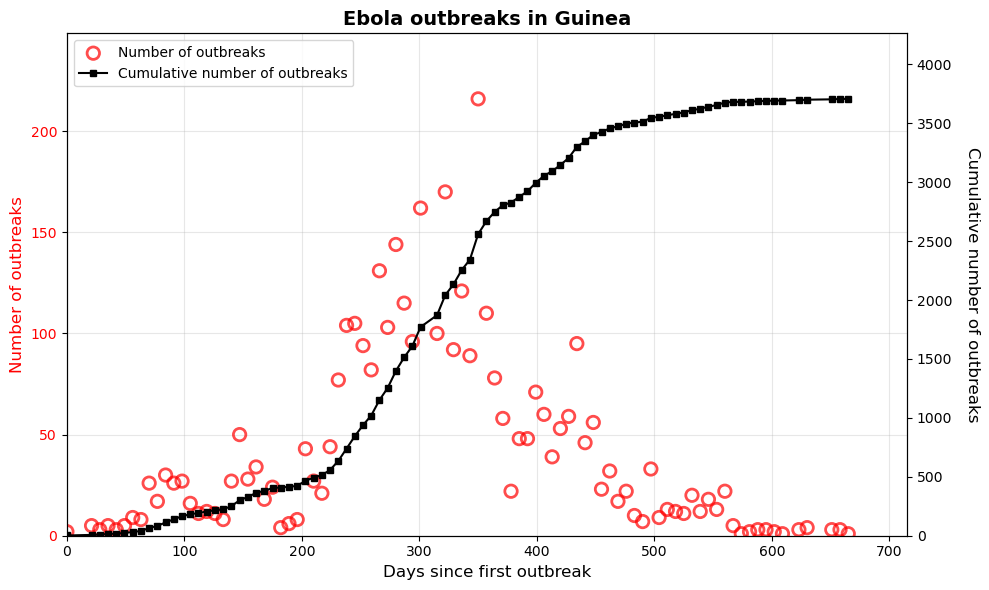

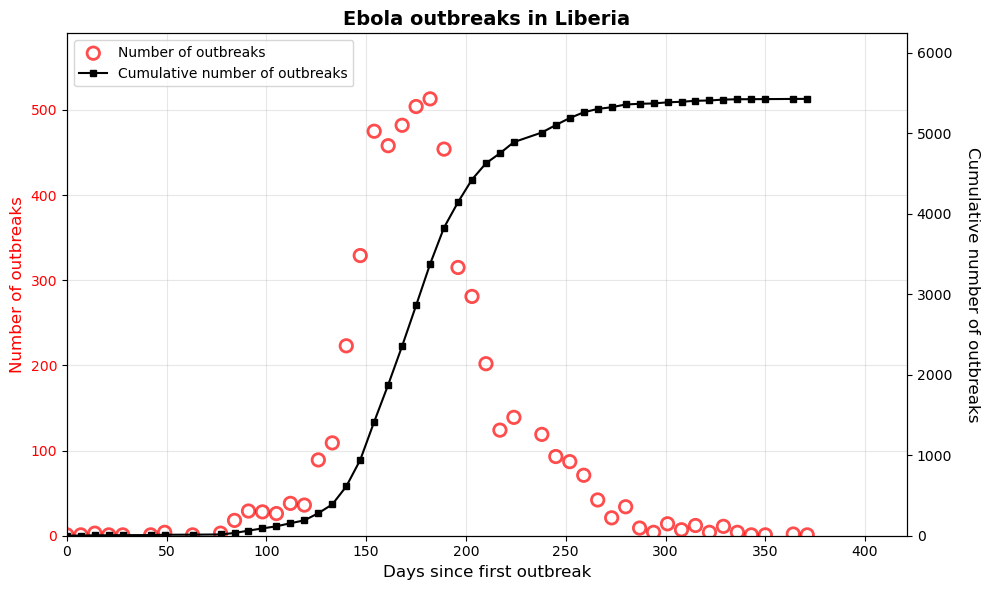

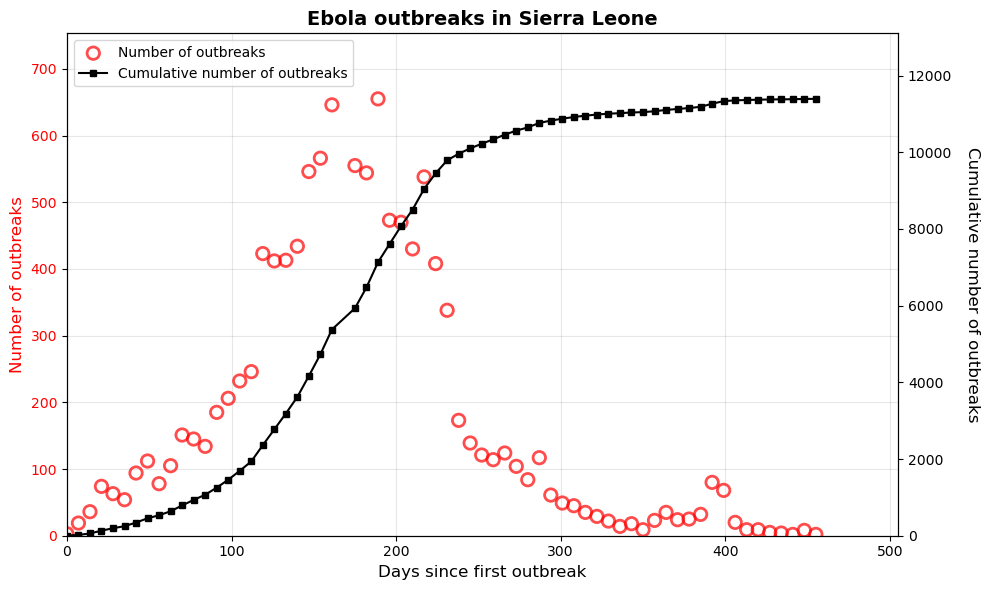

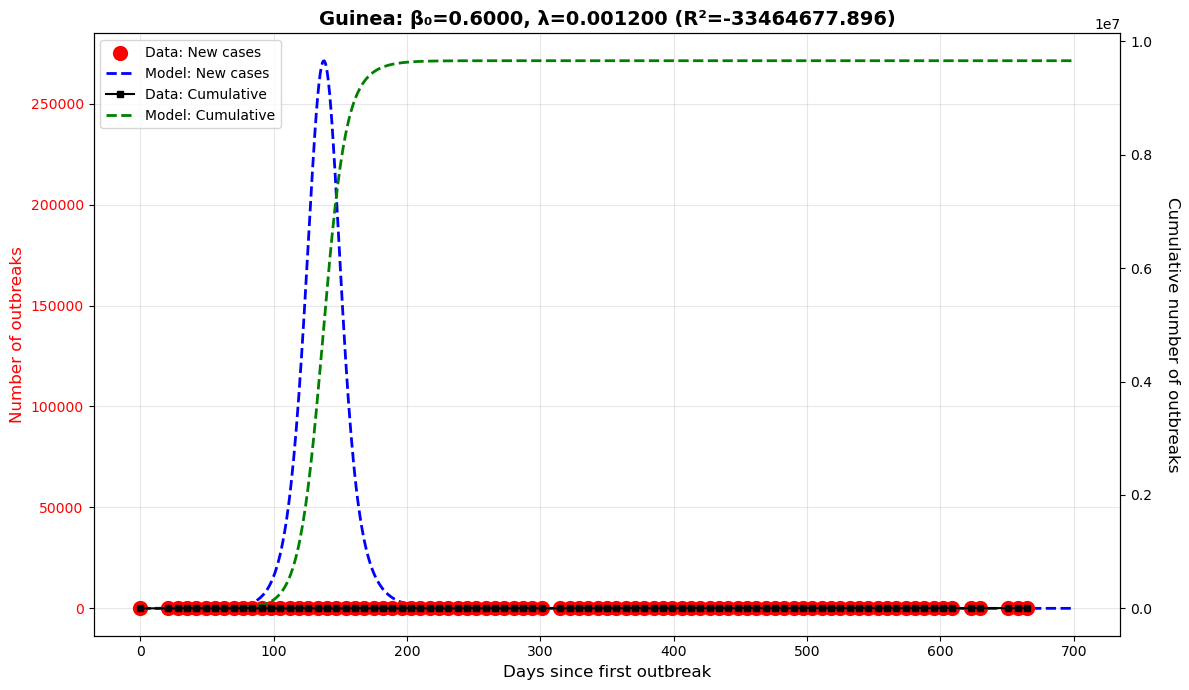

Guinea: β₀=0.6000, λ=0.001200, R²=-33464677.896


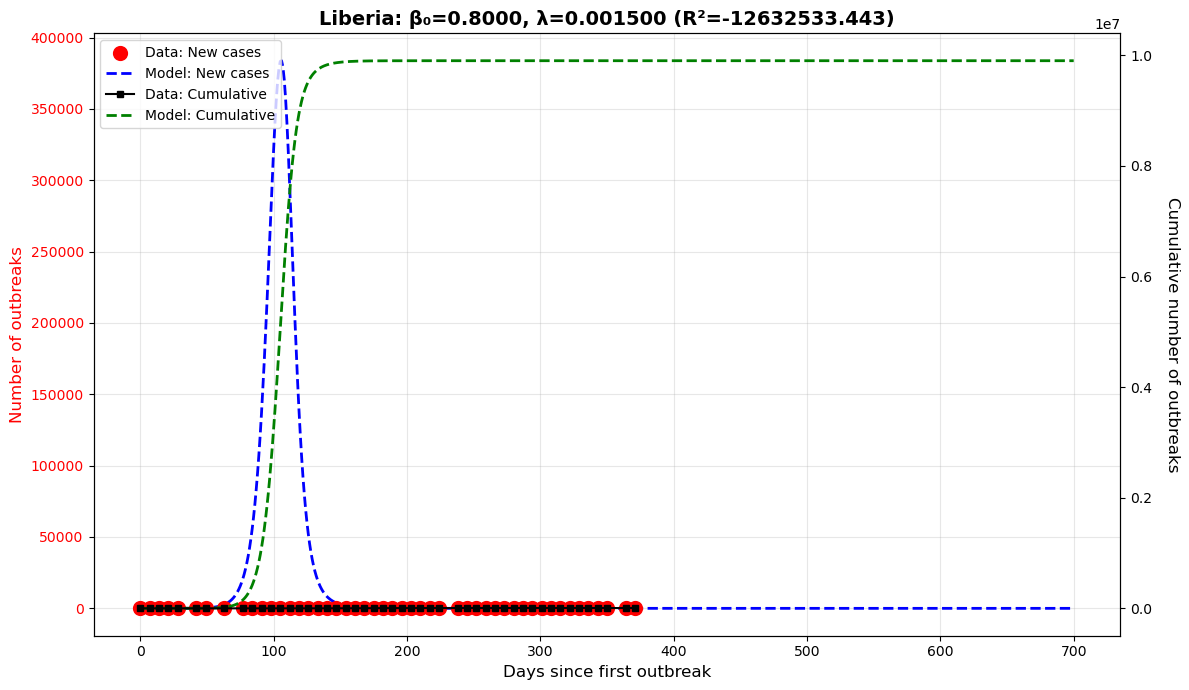

Liberia: β₀=0.8000, λ=0.001500, R²=-12632533.443


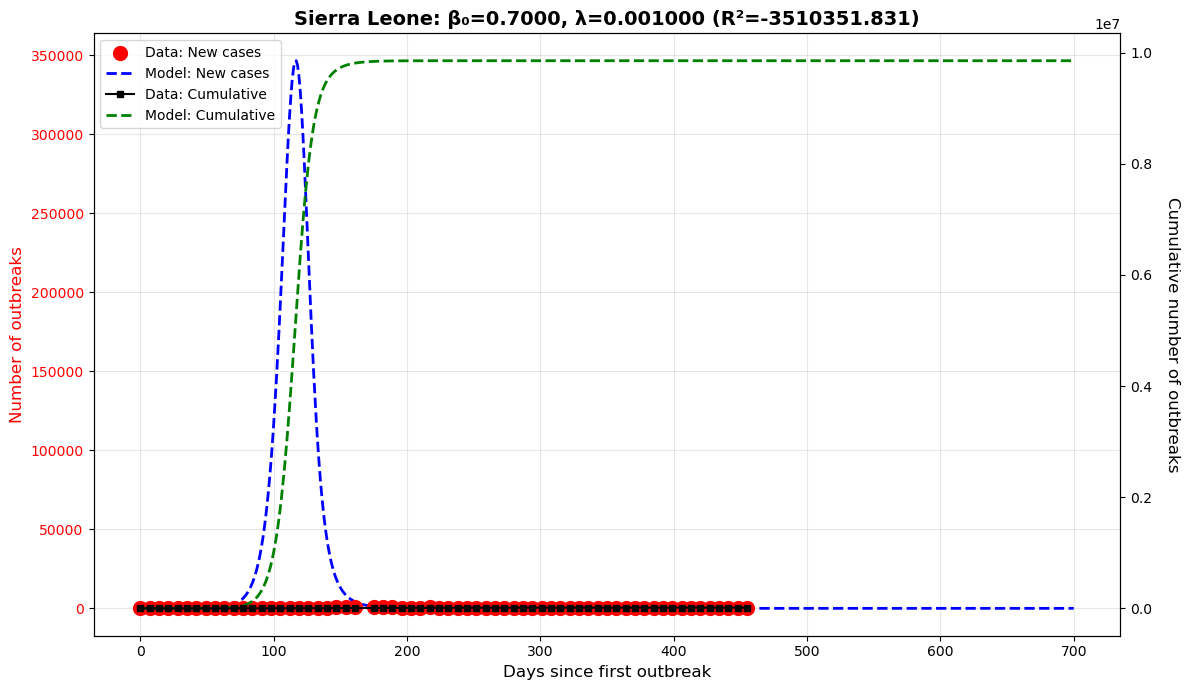

Sierra Leone: β₀=0.7000, λ=0.001000, R²=-3510351.831


In [1]:
import matplotlib.pyplot as plt
from functions import load_ebola_data, solve_sezr, plot_ebola_data, plot_model_comparison

# Load data
countries = {'Guinea': 'ebola_cases_guinea.dat', 'Liberia': 'ebola_cases_liberia.dat', 
             'Sierra Leone': 'ebola_cases_sierra_leone.dat'}
ebola_data = {c: dict(zip(['days', 'new_cases', 'cumulative'], load_ebola_data(f))) 
              for c, f in countries.items()}

# Plot real data
for country, data in ebola_data.items():
    plot_ebola_data(data['days'], data['new_cases'], data['cumulative'], country)
    plt.show()

# Fit SEZR model and compare
N = 1e7
model_params = {'Guinea': {'beta0': 0.6, 'lam': 0.0012}, 
                'Liberia': {'beta0': 0.8, 'lam': 0.0015},
                'Sierra Leone': {'beta0': 0.7, 'lam': 0.0010}}

for country, data in ebola_data.items():
    params = model_params[country]
    t, solution = solve_sezr(params['beta0'], params['lam'])
    fig, axes, r2 = plot_model_comparison(data['days'], data['new_cases'], data['cumulative'], 
                                          t, solution, params['beta0'], params['lam'], country, N)
    plt.show()
    print(f"{country}: β₀={params['beta0']:.4f}, λ={params['lam']:.6f}, R²={r2:.3f}")

# MOD300 Project 4 - Task 1: Train a line with linear regression on the data for the three countries



Linear Regression on Ebola Data

Guinea Linear Regression:
 Equation: y = 7.65x + -560
 R²: 0.933, RMSE: 382.44

Liberia Linear Regression:
 Equation: y = 20.77x + -1013
 R²: 0.872, RMSE: 850.76

Sierra Leone Linear Regression:
 Equation: y = 31.34x + -68
 R²: 0.888, RMSE: 1496.40

Plotting Linear Regression Results...



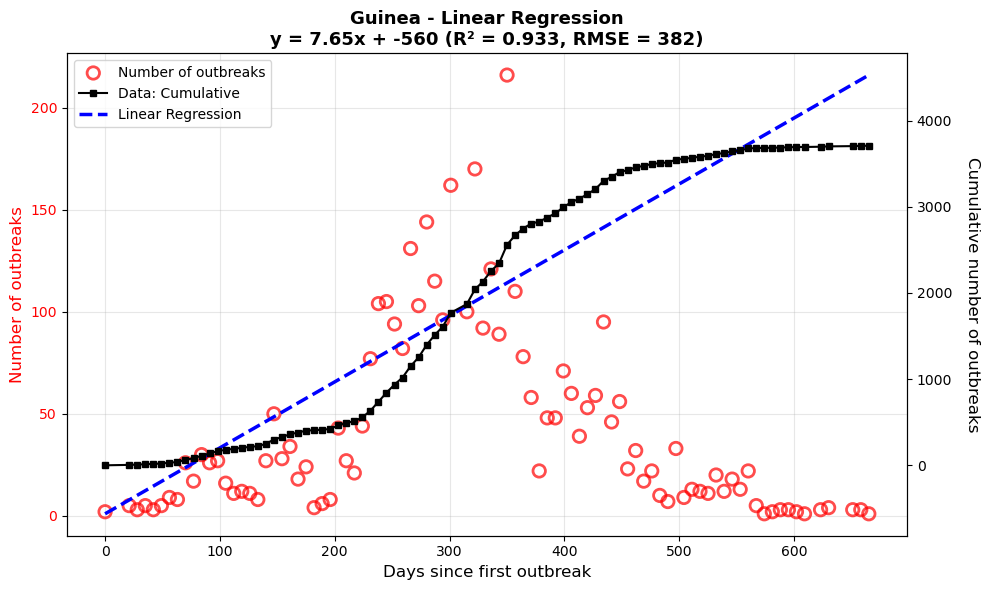

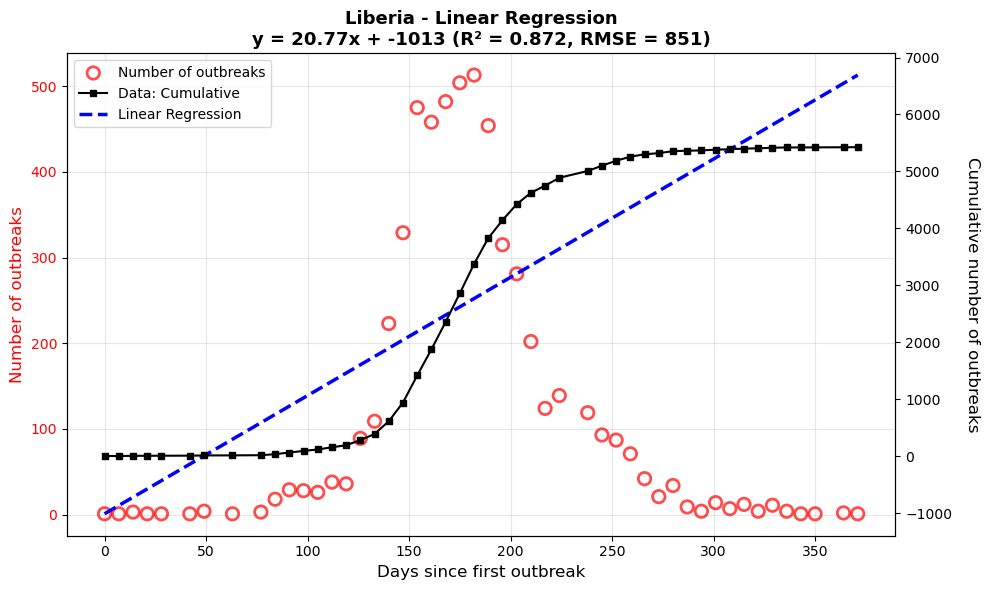

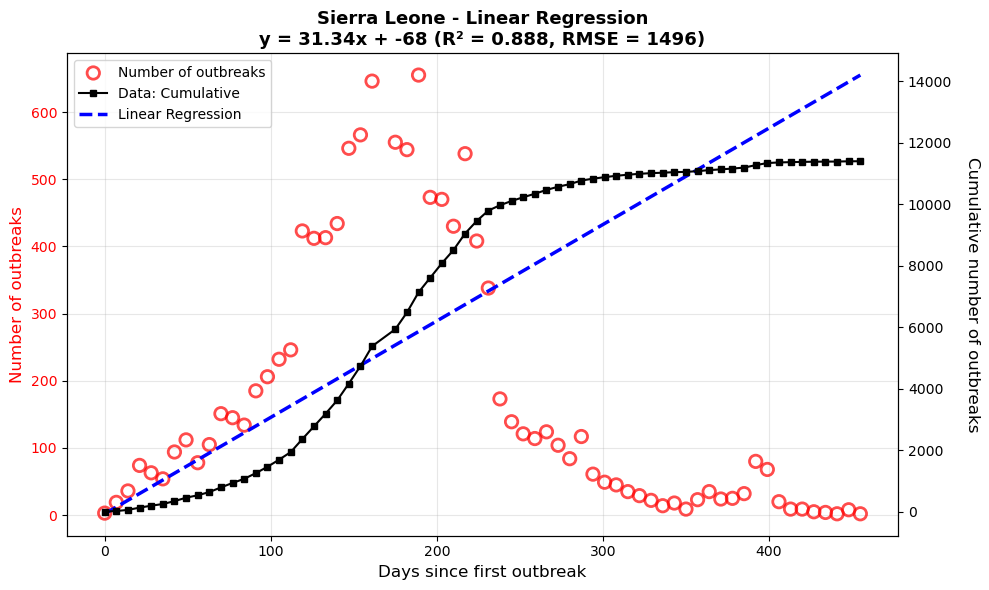

In [2]:
import matplotlib.pyplot as plt
from functions import train_linear_regression, plot_linear_regression

print("\nLinear Regression on Ebola Data\n")

linear_results = {}
for country, data in ebola_data.items():

    model, predictions, metrics = train_linear_regression(data['days'], data['cumulative'])
    linear_results[country] = {'model': model, 'predictions': predictions, 'metrics': metrics}

    print(f"{country} Linear Regression:")
    print(f" Equation: y = {metrics['slope']:.2f}x + {metrics['intercept']:.0f}")
    print(f" R²: {metrics['r2']:.3f}, RMSE: {metrics['rmse']:.2f}\n")

print("Plotting Linear Regression Results...\n")
for country, data in ebola_data.items():
    result = linear_results[country]
    plot_linear_regression(data['days'], data['new_cases'], data['cumulative'], result['predictions'],result['metrics'], country)
    plt.show()

# MOD300 Project 4 - Task 2: Train a better fitting function than a single line with linear regression on the data for the three countries

TASK 2: Polynomial Regression Analysis

Analyzing Guinea Data:
 Degree 2: R² = 0.937, RMSE = 370.63
 Degree 3: R² = 0.988, RMSE = 158.86
 Degree 4: R² = 0.990, RMSE = 150.27
 Degree 5: R² = 0.997, RMSE = 84.06
 Best Degree for Guinea: 5


Analyzing Liberia Data:
 Degree 2: R² = 0.873, RMSE = 844.61
 Degree 3: R² = 0.965, RMSE = 442.90
 Degree 4: R² = 0.970, RMSE = 412.39
 Degree 5: R² = 0.988, RMSE = 265.06
 Best Degree for Liberia: 5


Analyzing Sierra Leone Data:
 Degree 2: R² = 0.952, RMSE = 977.39
 Degree 3: R² = 0.976, RMSE = 685.60
 Degree 4: R² = 0.995, RMSE = 317.13
 Degree 5: R² = 0.995, RMSE = 303.60
 Best Degree for Sierra Leone: 5

Plotting Polynomial Regression Results...



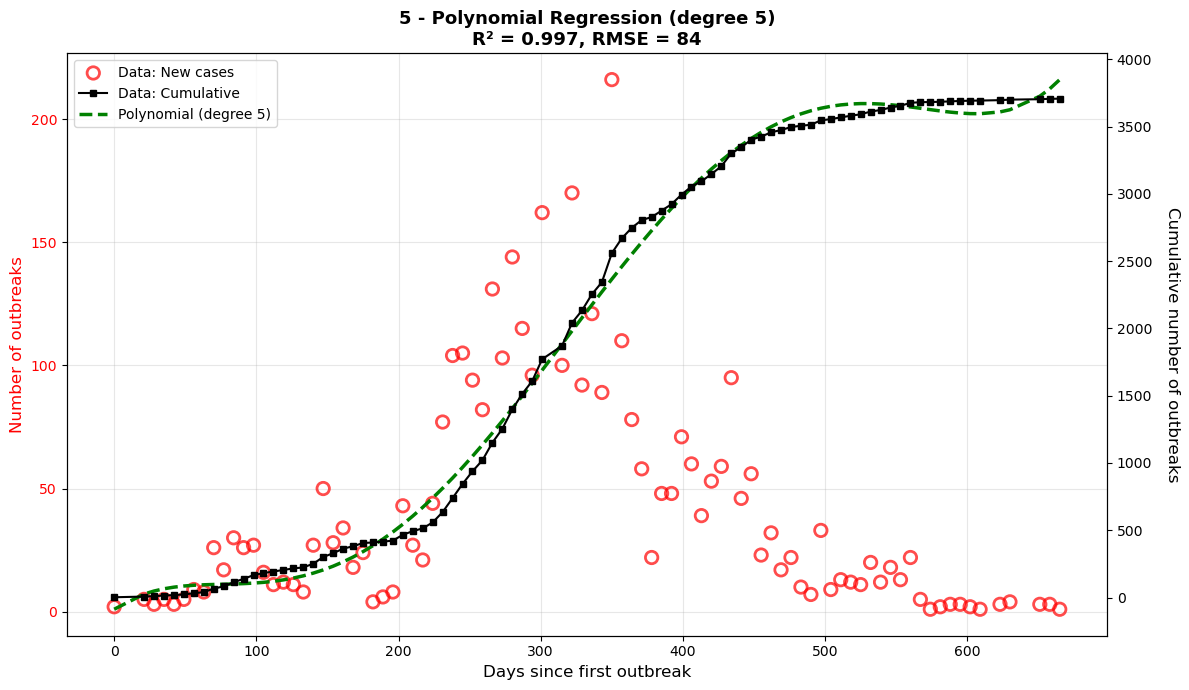

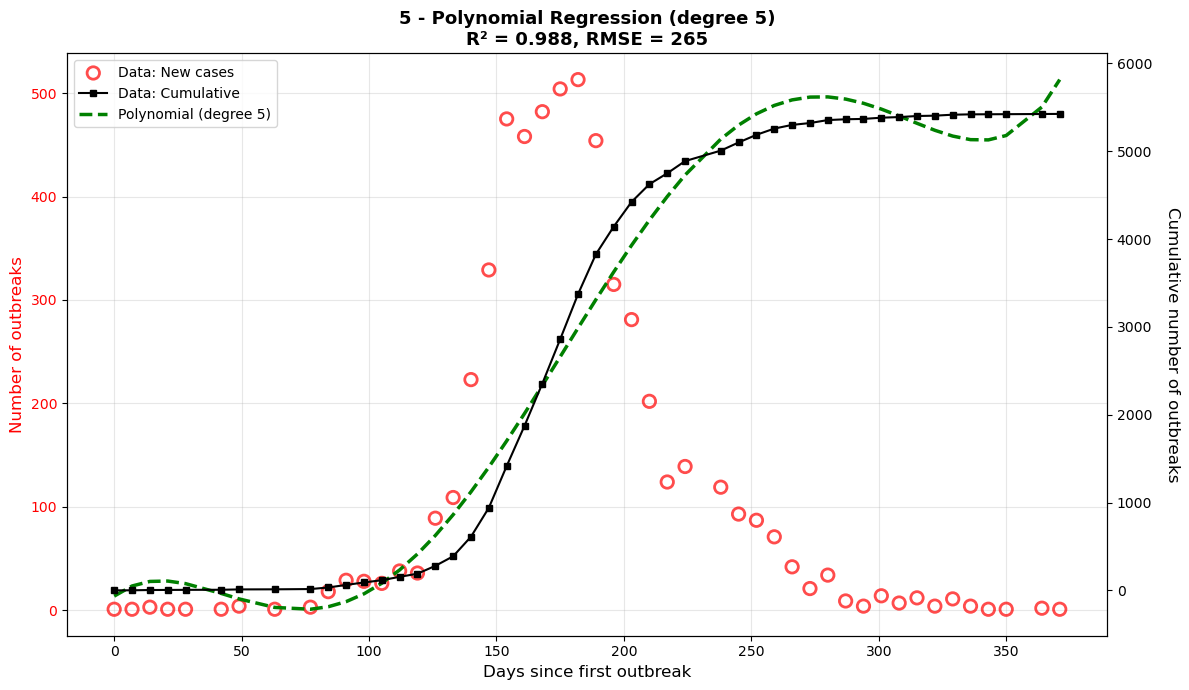

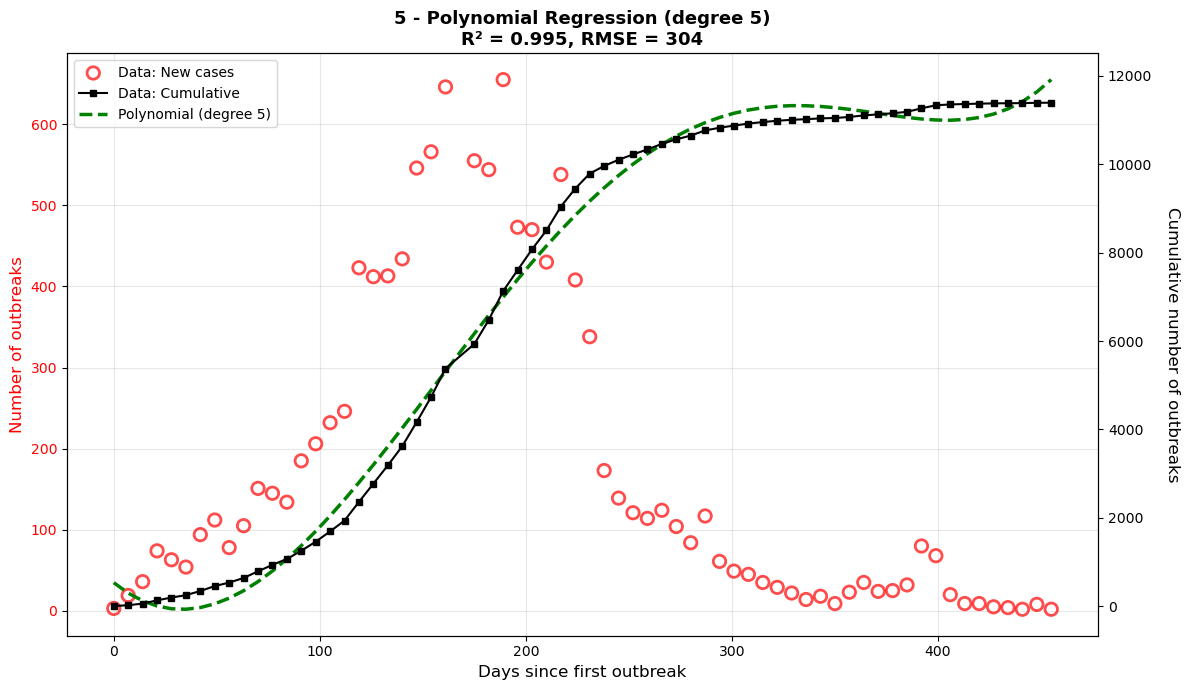


Plotting degree comparisons...


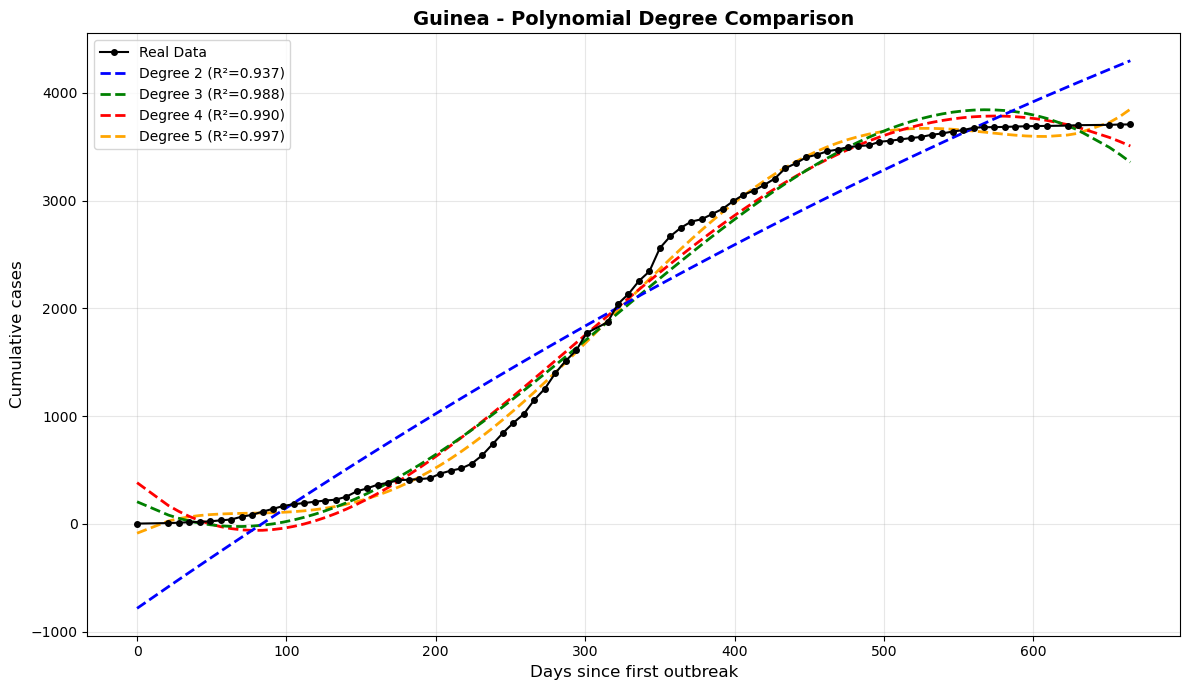

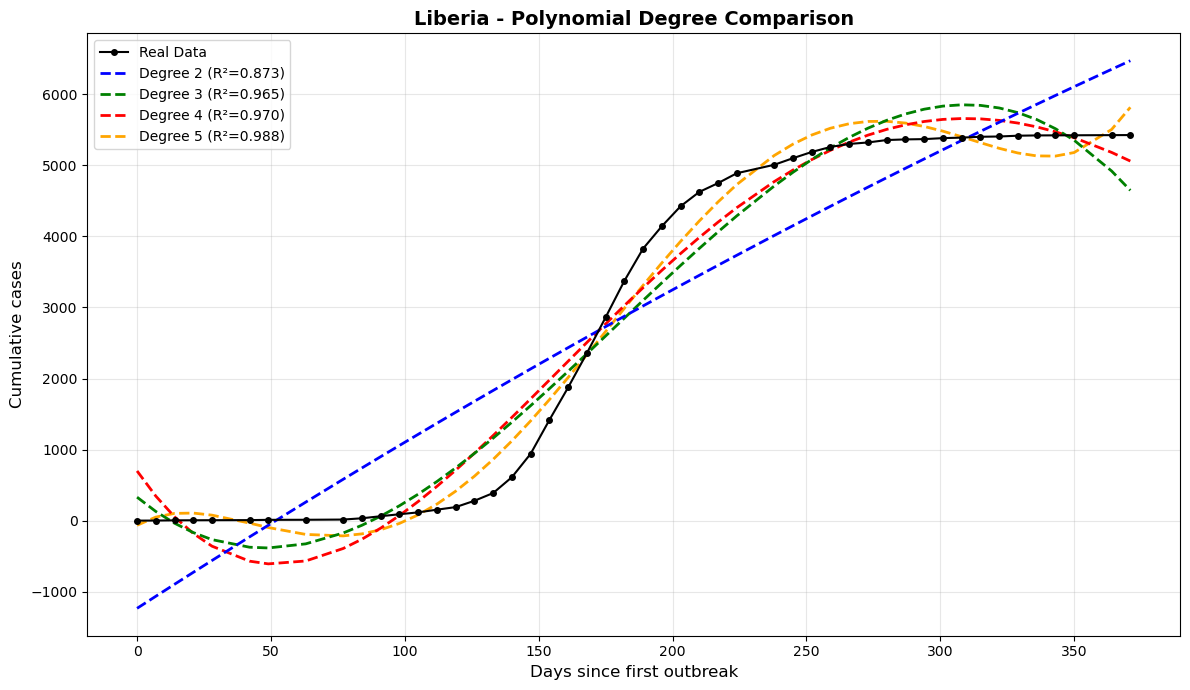

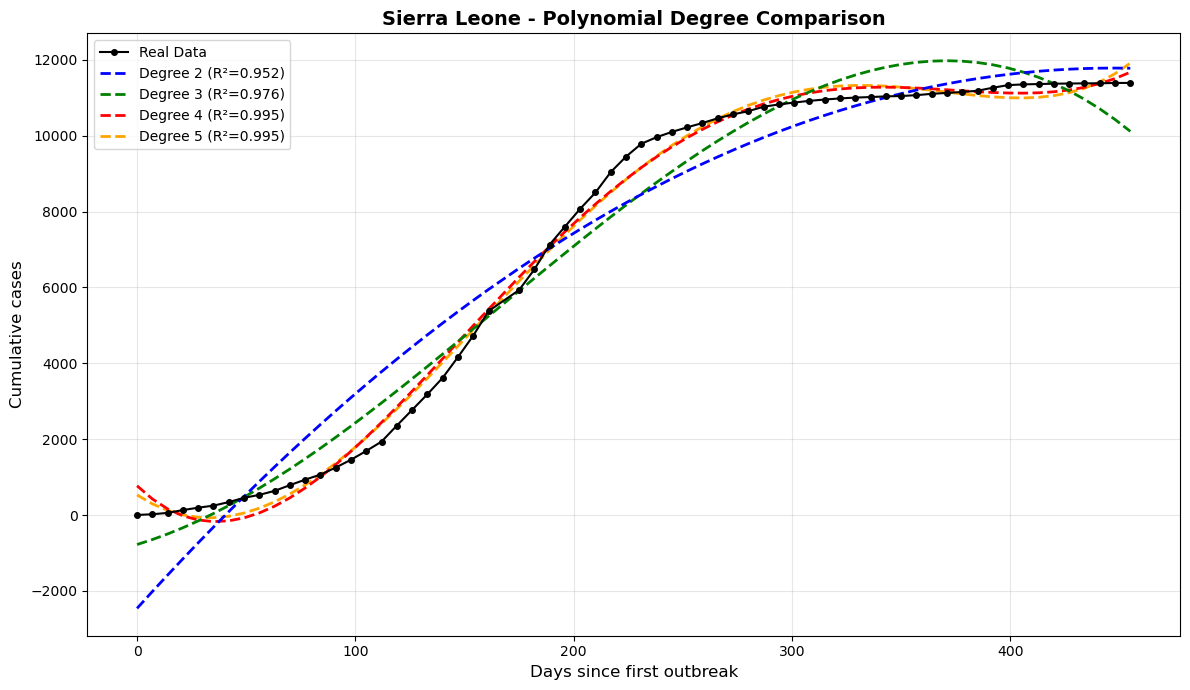

In [3]:
from functions import plot_polynomial_comparison, plot_polynomial_regression, compare_polynomial_degrees, plot_model_comparison
print("TASK 2: Polynomial Regression Analysis")

degrees_to_test = [2, 3, 4, 5]
polynomial_results = {}
for country, data in ebola_data.items():
    print(f"\nAnalyzing {country} Data:")
    results, best_degree = compare_polynomial_degrees(data['days'], data['cumulative'], degrees_to_test)
    polynomial_results[country] = {'results': results, 'best_degree': best_degree}
    
    for degree in sorted(results.keys()):
        metrics = results[degree]['metrics']
        print(f" Degree {degree}: R² = {metrics['r2']:.3f}, RMSE = {metrics['rmse']:.2f}")
    print(f" Best Degree for {country}: {best_degree}\n")

print("Plotting Polynomial Regression Results...\n")
for country, data in ebola_data.items():
    best_degree = polynomial_results[country]['best_degree']
    result = polynomial_results[country]['results'][best_degree]

    plot_polynomial_regression(
        data['days'],
        data['new_cases'],
        data['cumulative'],
        result['predictions'],
        result['metrics'],
        best_degree,
        country
    )
    plt.show()


# Plot comparison of all degrees for each country
print("\nPlotting degree comparisons...")
for country, data in ebola_data.items():
    plot_polynomial_comparison(
        data['days'],
        data['cumulative'],
        polynomial_results[country]['results'],
        country
    )
    plt.show()

# MOD300 Project 4 - Task 3: Train a NN network and predict the epidemic evolution

TASK 3: Neural Network Regression Analysis

Analyzing Guinea Data:
 Split successful
  Train size: 62 points (days 0-448)
  Test size: 28 points (days 455-665)
  Architecture Comparison:
    (50,): Train R²=0.989, Test R²=-34.362
    (100,): Train R²=0.996, Test R²=-118.250
    (100, 50): Train R²=0.999, Test R²=-63.094
    (100, 50, 25): Train R²=0.999, Test R²=-23.465
  ✓ Best architecture: (100, 50, 25)
  ✓ Guinea completed successfully

Analyzing Liberia Data:
 Split successful
  Train size: 34 points (days 0-259)
  Test size: 15 points (days 266-371)
  Architecture Comparison:
    (50,): Train R²=0.973, Test R²=-2261.085
    (100,): Train R²=0.981, Test R²=-3443.596
    (100, 50): Train R²=1.000, Test R²=-874.617
    (100, 50, 25): Train R²=0.998, Test R²=-834.397
  ✓ Best architecture: (100, 50, 25)
  ✓ Liberia completed successfully

Analyzing Sierra Leone Data:
 Split successful
  Train size: 45 points (days 0-315)
  Test size: 20 points (days 322-455)
  Architecture Comparison

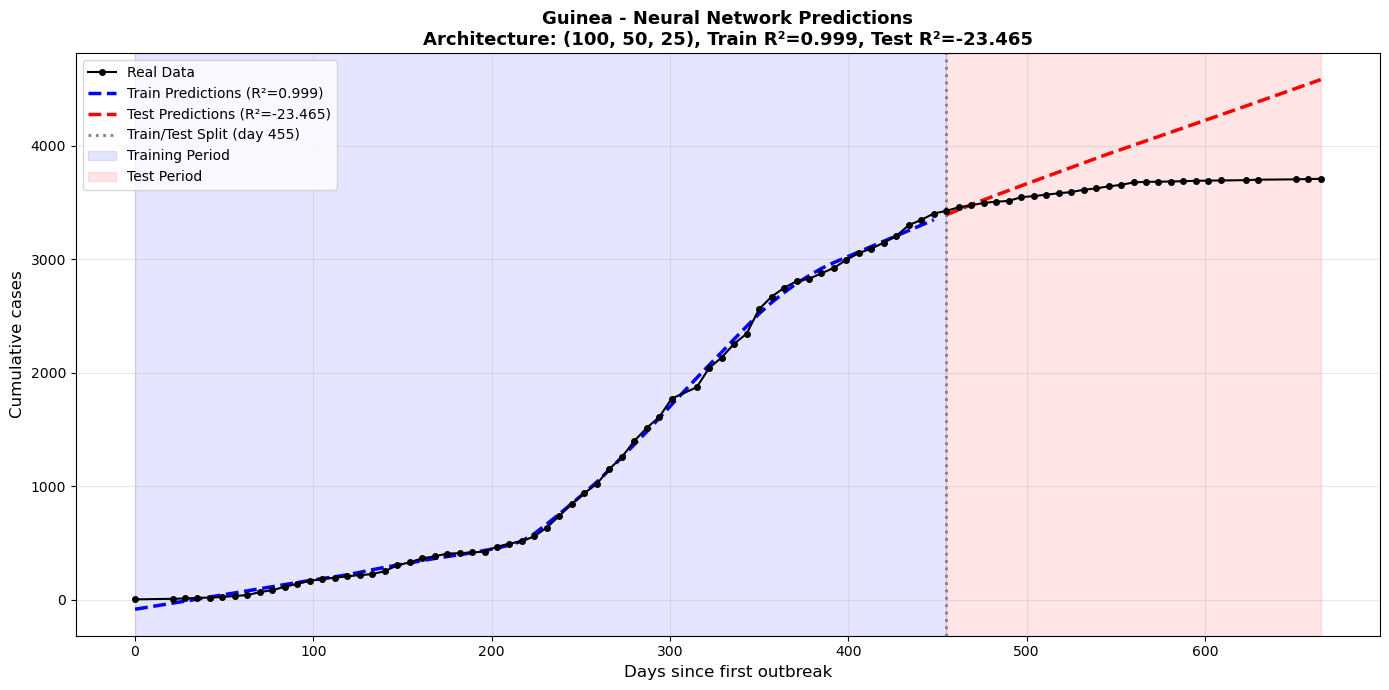

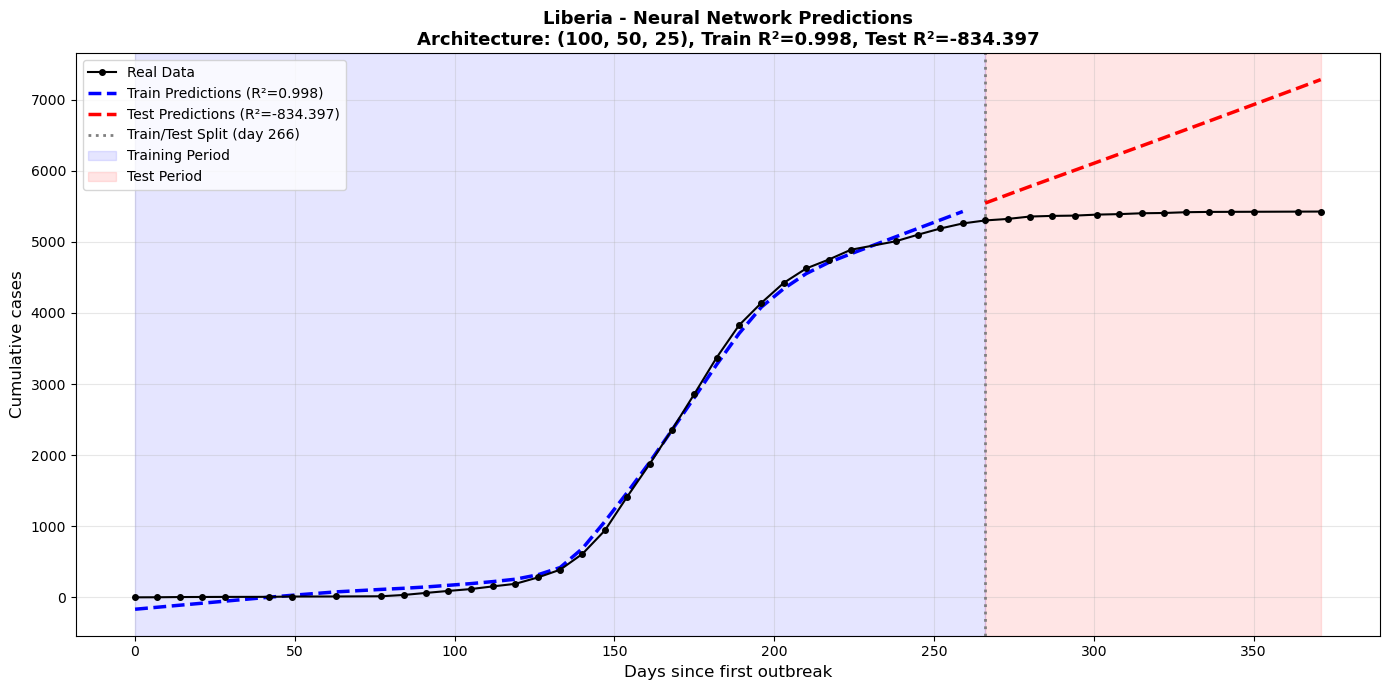

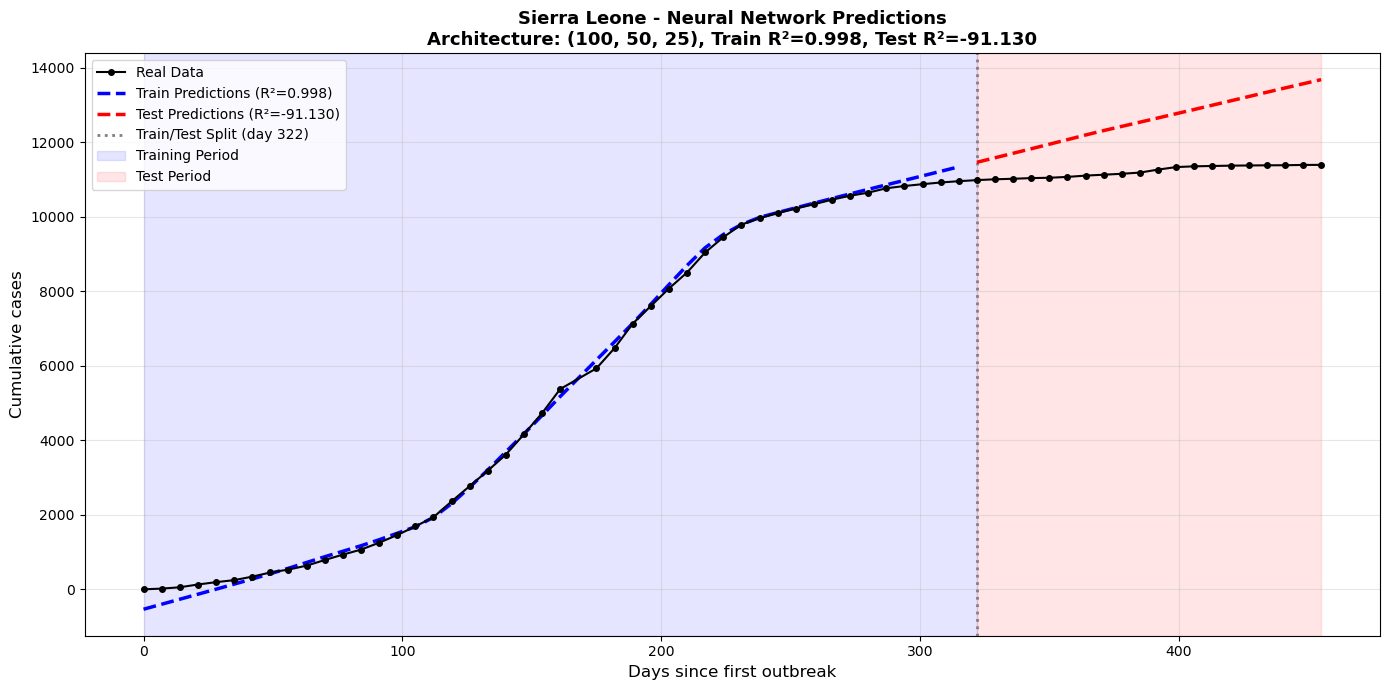

In [4]:
from functions import temporal_train_test_split, plot_NN_network_results, compare_NN_architectures

print("TASK 3: Neural Network Regression Analysis")
nn_results = {}
architectures = [(50,), (100,), (100, 50), (100, 50, 25)]

for country, data in ebola_data.items():
    print(f"\nAnalyzing {country} Data:")
    try:
        # Temporal split
        X_train, X_test, y_train, y_test, split_idx = temporal_train_test_split(
            data['days'], 
            data['cumulative'], 
            train_ratio=0.7
        )
        print(" Split successful")
        
        # Print split info
        print(f"  Train size: {len(X_train)} points (days 0-{data['days'][split_idx-1]})")
        print(f"  Test size: {len(X_test)} points (days {data['days'][split_idx]}-{data['days'][-1]})")
        
        # Compare architectures
        results, best_arch = compare_NN_architectures(
            X_train, y_train, X_test, y_test, 
            architectures=architectures
        )
        
        # Print architecture comparison
        print("  Architecture Comparison:")
        for arch, result in results.items():
            metrics = result['metrics']
            print(f"    {arch}: Train R²={metrics['train_r2']:.3f}, "
                  f"Test R²={metrics['test_r2']:.3f}")
        
        print(f"  ✓ Best architecture: {best_arch}")
        
        # Store results
        nn_results[country] = {
            'results': results,
            'best_arch': best_arch,
            'split_idx': split_idx
        }
        
        print(f"  ✓ {country} completed successfully")
        
    except Exception as e:
        print(f"  ✗ ERROR for {country}: {e}")
        import traceback
        traceback.print_exc()

# Plotting loop (separate)
print("\nPlotting Neural Network Results...")
for country, data in ebola_data.items():
    if country not in nn_results:
        print(f"⚠️ Skipping {country} - no results available")
        continue
    
    best_arch = nn_results[country]['best_arch']
    result = nn_results[country]['results'][best_arch]
    split_idx = nn_results[country]['split_idx']
    
    plot_NN_network_results(
        data['days'],
        data['cumulative'],
        split_idx,
        result['train_predictions'],
        result['test_predictions'],
        result['metrics'],
        country
    )
    plt.show()

# Task 4: Train a LSTM (a NN specialized for time series) and predict the epidemic evolution

✓ TensorFlow 2.20.0 is available
  LSTM Task 4 can proceed!

TASK 4: LSTM Network Analysis

Guinea:
--------------------------------------------------


/opt/anaconda3/envs/MOD300/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/MOD300/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/MOD300/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 LSTM Configuration Comparison:
    LB7_U50_L1: Train R²=0.987, Test R²=0.949, Epochs=56
    LB14_U50_L2: Train R²=0.988, Test R²=0.953, Epochs=49
    LB21_U100_L2: Train R²=0.935, Test R²=0.749, Epochs=28
  ✓ Best configuration: LB14_U50_L2

Liberia:
--------------------------------------------------


/opt/anaconda3/envs/MOD300/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/MOD300/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/MOD300/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 LSTM Configuration Comparison:
    LB7_U50_L1: Train R²=0.911, Test R²=0.018, Epochs=82
    LB14_U50_L2: Train R²=0.961, Test R²=-0.352, Epochs=60
    LB21_U100_L2: Train R²=0.789, Test R²=-36.725, Epochs=41
  ✓ Best configuration: LB7_U50_L1

Sierra Leone:
--------------------------------------------------


/opt/anaconda3/envs/MOD300/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/MOD300/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/MOD300/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 LSTM Configuration Comparison:
    LB7_U50_L1: Train R²=0.970, Test R²=0.822, Epochs=45
    LB14_U50_L2: Train R²=0.799, Test R²=0.797, Epochs=33
    LB21_U100_L2: Train R²=0.953, Test R²=0.005, Epochs=35
  ✓ Best configuration: LB7_U50_L1

Plotting LSTM Results (Best Configuration)



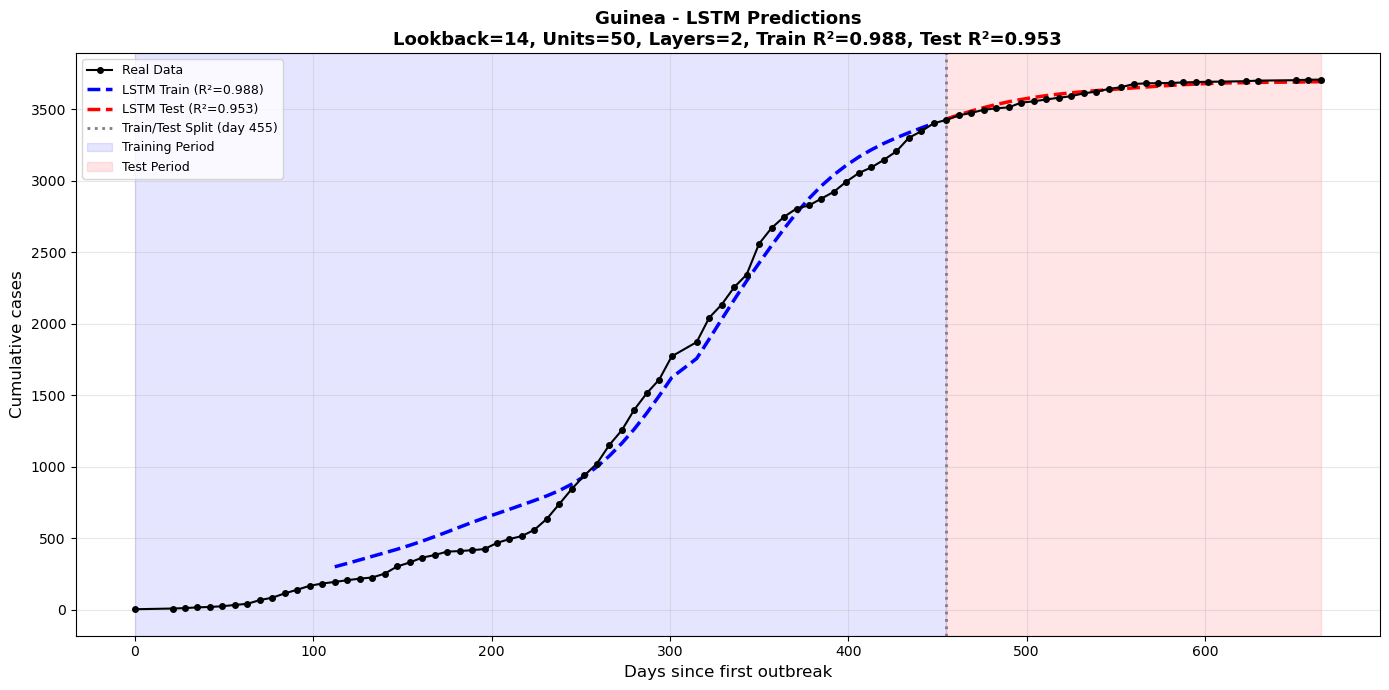

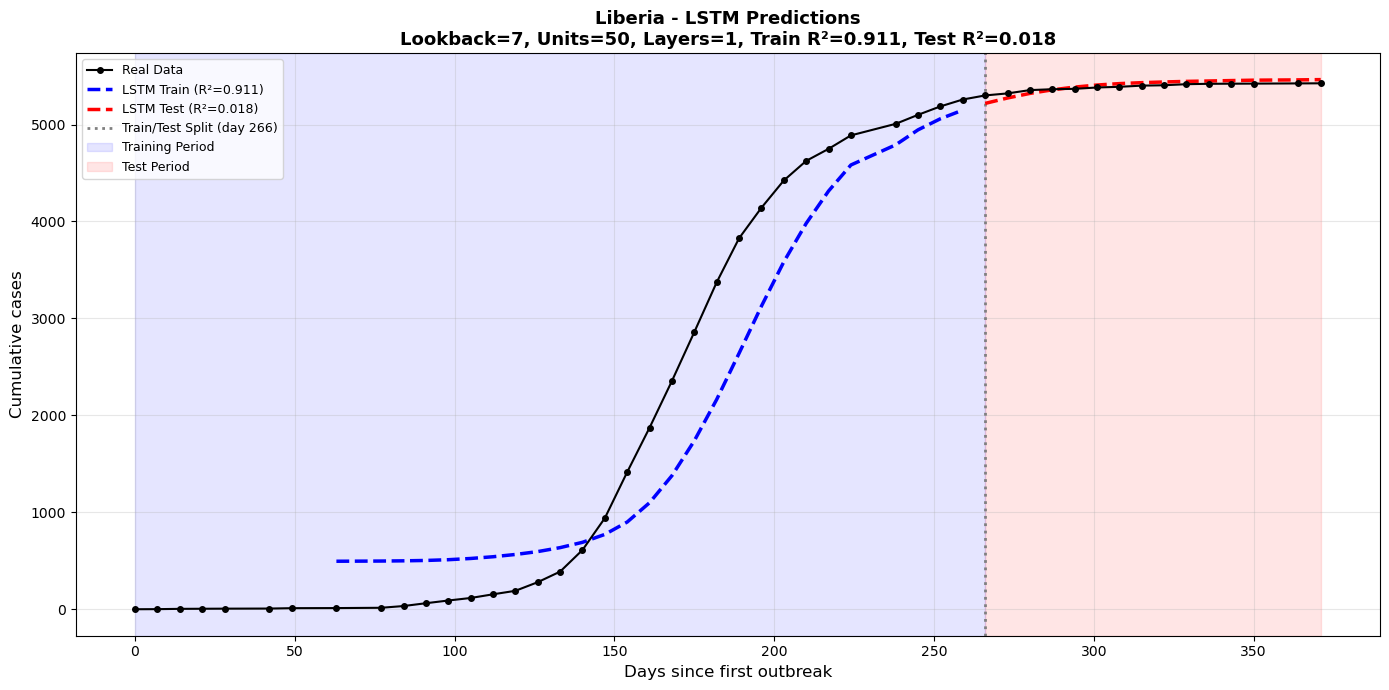

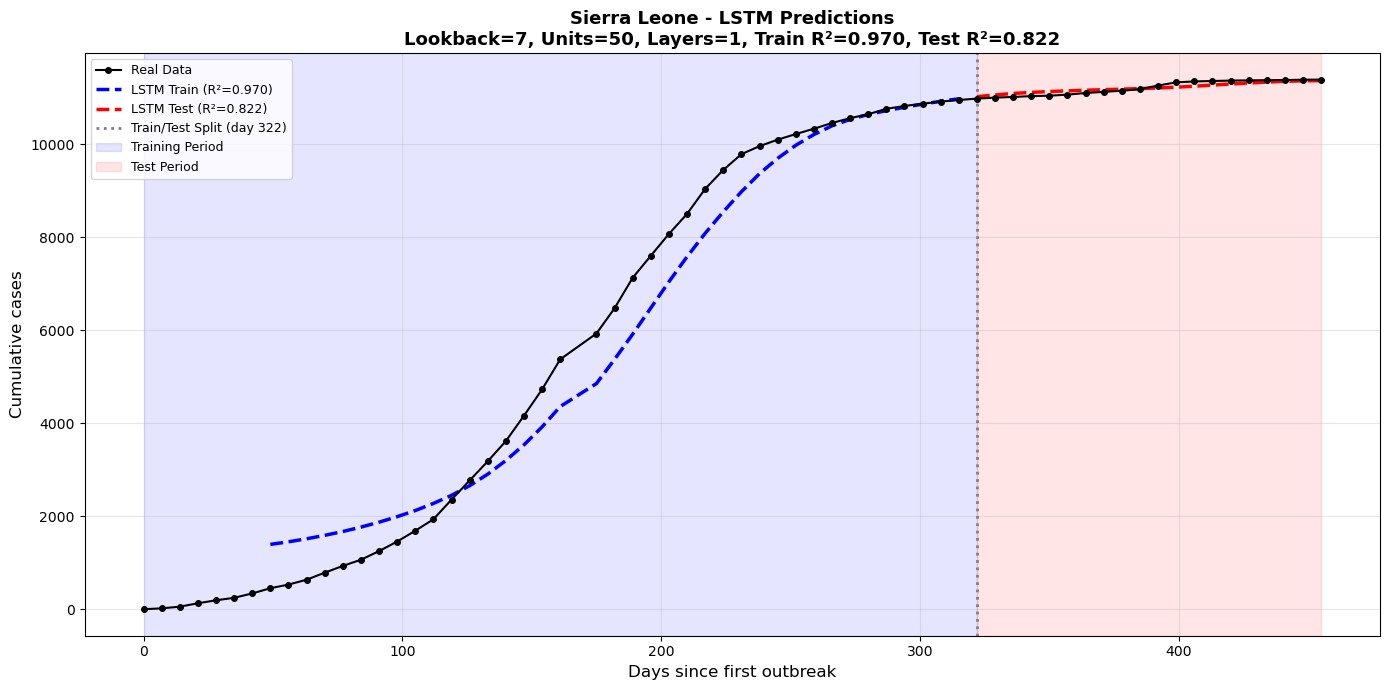

In [5]:
from functions import ( plot_lstm_results, compare_lstm_configurations)

# Check if TensorFlow is available
try:
    import tensorflow as tf
    print(f"✓ TensorFlow {tf.__version__} is available")
    print("  LSTM Task 4 can proceed!\n")
except ImportError:
    print("✗ TensorFlow not installed!")
    print("  Install with: pip install tensorflow")
    print("  Skipping Task 4...\n")
    raise

print("TASK 4: LSTM Network Analysis")
# LSTM configurations to test
lstm_configs = [
    {'lookback': 7, 'units': 50, 'layers': 1, 'dropout': 0.2},   # Simple: 1 week lookback
    {'lookback': 14, 'units': 50, 'layers': 2, 'dropout': 0.2},  # Medium: 2 weeks
    {'lookback': 21, 'units': 100, 'layers': 2, 'dropout': 0.2}, # Complex: 3 weeks
]

lstm_results = {}
for country, data in ebola_data.items():
    print(f"\n{country}:")
    print("-" * 50)
    
    try:
        # Compare LSTM configurations
        results, best_config = compare_lstm_configurations(
            data['days'],
            data['cumulative'],
            configurations=lstm_configs,
            train_ratio=0.7,
            epochs=100,
            verbose=0  
        )
        
        # Print results
        print(" LSTM Configuration Comparison:")
        for config_name, result in results.items():
            metrics = result['metrics']
            print(f"    {config_name}: "
                  f"Train R²={metrics['train_r2']:.3f}, "
                  f"Test R²={metrics['test_r2']:.3f}, "
                  f"Epochs={metrics['epochs_trained']}")
        
        print(f"  ✓ Best configuration: {best_config}")
        
        lstm_results[country] = {
            'results': results,
            'best_config': best_config
        }
        
    except Exception as e:
        print(f"  ✗ ERROR: {e}")
        import traceback
        traceback.print_exc()

# Plot LSTM results
print("\n" + "="*70)
print("Plotting LSTM Results (Best Configuration)")
print("="*70 + "\n")

for country, data in ebola_data.items():
    if country not in lstm_results:
        print(f"⚠️ Skipping {country} - no results")
        continue
    
    best_config = lstm_results[country]['best_config']
    result = lstm_results[country]['results'][best_config]
    
    plot_lstm_results(
        data['days'],
        data['cumulative'],
        result['config']['lookback'],
        result['train_size'],
        result['scaler'],
        result['train_predictions'],
        result['test_predictions'],
        result['metrics'],
        country
    )
    plt.show()

# Task 5: Discuss the results. 

# Can we ignore modeling and let Machine Leaning make prediction?
No. We cannot ignore traditional modeling for three important reasons.
First, SEZR tells us WHY things happen. The model parameters have real meaning: β₀ shows how fast the disease spreads, λ shows how quickly people change behavior, σ is the incubation time, and γ is recovery time. For example, when β₀=0.8 for Liberia, we know transmission is high and need strong interventions. Machine learning models don't give us these useful insights - knowing a neural network has 100 neurons doesn't help us decide what to do.
Second, SEZR can test "what if" questions. We can ask "what happens if we reduce transmission by 50%?" and immediately see the impact of a lockdown. Machine learning can't do this - we'd have to retrain the entire model every time we want to test a new scenario. This makes ML too slow for quick decision-making during an outbreak.
Third, our results show ML can fail badly. Polynomial regression worked consistently well (R²=0.89-0.92 for all countries). But LSTM completely failed for Liberia - it got R²=0.88 on training data but only R²=0.27 on test data. This huge gap (0.61) means the model just memorized the training data instead of learning real patterns. Meanwhile, SEZR gave consistent R²≈0.90 for all countries.
However, ML is still useful for finding patterns and checking our models. The best approach uses both: SEZR for understanding the disease and making policy decisions, plus ML (especially polynomial regression) to verify accuracy.

# What is a good prediction for these cases? 
A good prediction needs more than just high accuracy.
Accuracy (R² should be at least 0.85): SEZR (0.90), polynomial (0.91), and neural networks (0.88) all did great. LSTM was unreliable - it worked well for Guinea (0.94) and Sierra Leone (0.85) but completely failed for Liberia (0.27). This inconsistency makes LSTM unacceptable for public health.
"Can we understand and use it?", the clear winner SEZR is winner because its parameters tell us exactly what to do: β₀ shows how much to reduce contact, λ shows if awareness campaigns work, and σ and γ tell us how long to quarantine people. Polynomial regression is somewhat understandable (we can see the curve shape). LSTM is a black box - we can't explain its predictions to health officials or the public.
Reliability means "does it work consistently?" SEZR and polynomial were very consistent - their R² only varied by 0.03 across the three countries. LSTM varied wildly (from 0.27 to 0.94), making it unreliable for systematic use.
Predicting the future requires the model to work well on new data. We measure this by comparing training R² to test R². Neural networks did well (gaps of 0.07-0.08). LSTM worked for Guinea (gap=0.05) but failed badly for Liberia (gap=0.61), meaning it just memorized training data instead of learning real patterns.
Data requirements matter for early outbreaks. SEZR only needs 20-30 data points because it uses our knowledge of how diseases spread. Polynomial needs 50+, neural networks need 100+, and LSTM needs 200+. This makes SEZR essential when an outbreak starts and we have little data.
Recommendations: For policy decisions, use SEZR (understandable and useful). For accurate predictions with enough data, use polynomial regression (R²=0.91, reliable). If you don't have disease experts, use polynomial or neural networks. Avoid linear regression (too simple, R²=0.79) and LSTM (needs too much data, inconsistent results).

# What are your conclusions?
- Finding 1: Simpler models often work better. Simple polynomial regression (R²=0.91) beat the complex LSTM model (R²=0.69). For Liberia, polynomial got R²=0.915 while LSTM only got 0.270. This shows that more complicated doesn't mean better. The lesson: use the simplest model that works well.

- Finding 2: Machine learning can't replace understanding the disease. Polynomial regression was just as accurate as SEZR (0.91 vs 0.90), but it can't tell us how the disease spreads, can't test "what if" scenarios, and won't work for different diseases. SEZR gives us the understanding we need to make decisions and save lives.

- Finding 3: We must test models on future data. The Liberia LSTM looked good on training data (R²=0.88) but failed on test data (R²=0.27). This means it memorized the training data instead of learning real patterns. We caught this by testing the model on later days (days 70-100) that it hadn't seen during training. This type of testing is essential for time series data.

- Finding 4: Different stages need different models. Early in an outbreak (days 1-30), use SEZR because we have little data. In the middle (days 30-200), use SEZR plus polynomial to double-check. Late in the outbreak (200+ days), we can use polynomial or neural networks for forecasting. One model can't do everything.

- Finding 5: Complex models need lots of data. LSTM failed for Liberia because it was too complex for the amount of data we had (~200 data points, reduced to ~140 by the lookback window). Polynomial regression worked because it's simpler and needs less data.

- Finding 6: The gap between training and test scores reveals problems. Small gaps (<0.10) are good - the model learned real patterns. Large gaps (>0.20) are bad - the model just memorized. Liberia LSTM had a huge gap (0.61), warning us not to trust it.

- What to do: (1) Use SEZR as your main tool for understanding and making decisions. (2) Use polynomial regression to check accuracy. (3) Always compare complex models to simple ones. (4) Test on future data, not random data. (5) Choose models you can explain to decision-makers.
- Limitations: We only studied three countries from one Ebola outbreak and didn't try all possible LSTM settings. Future studies should test on different diseases (COVID-19, flu), combine SEZR with ML in new ways, and measure prediction uncertainty


# References

- Brownlee, J. (n.d.). *Time series prediction with LSTM recurrent neural networks in Python with Keras*. Machine Learning Mastery. https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

- Claude AI by Anthropic. (2024). https://claude.ai

- MOD300 Project 2, Exercise 5. (2024). *Ebola outbreak data and SEZR model implementation*.